# Lead Scoring Case Study 

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

df = pd.read_csv(r'C:\Users\91844\Desktop\My PGD DS\ML\Lead Scoring case study\Lead Scoring Assignment\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Understanding

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [6]:
# Checking for duplicate values in the column 'Prospect ID'

sum(df.duplicated(subset='Prospect ID')) == 0

True

In [7]:
# Checking for duplicate values in the column 'Lead Number'

sum(df.duplicated(subset='Lead Number')) == 0

True

#### Let's drop these columns since they have all unique values. Prospect ID & Lead Number are two variables that are just indicative of the ID number of the customers.

In [8]:
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [9]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Clearly, there are a few columns which have certain values 'Select' which means that they have not selected the option for those columns.

In [10]:
# Replacing the 'Select' values with NaN

df = df.replace('Select', np.NaN)

In [11]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Checking null values

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Checking the percentage of null values

round(100* (df.isnull().sum()/ len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Here, it can be seen that so many columns which are not of much importance have high percentage of null values.

In [14]:
# Dropping the columns with null values more than 45%

cols = df.columns

for i in cols:
    if ((round(100*(df[i].isnull().sum()/ len(df.index))) >= 45)):
        df.drop(i, axis = 1, inplace = True)

In [15]:
round(100* (df.isnull().sum()/ len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


## Exploratory Data Analysis

### Analyzing the Categorical Attributes

In [17]:
# Checking the value_counts of City column

df.City.value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Clearly, there are NaN values in the column which can be imputed with Mumbai.

In [18]:
# Replacing NaN values in City column

df.City = df.City.replace(np.NaN, 'Mumbai')

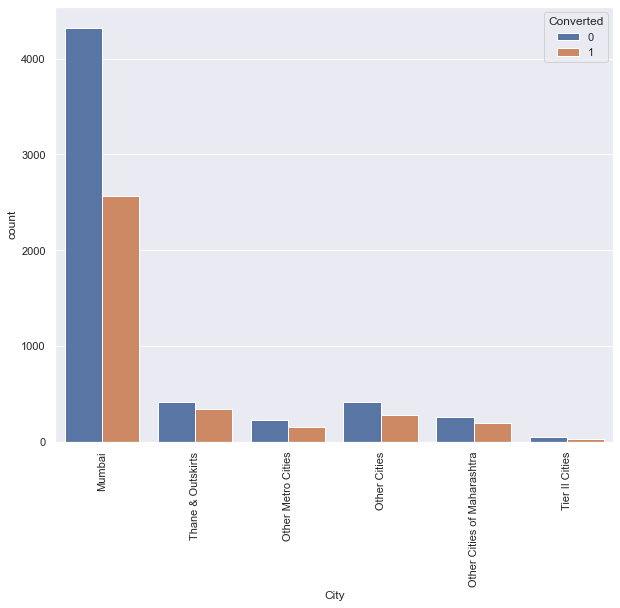

In [19]:
# Countplot of City column

plt.figure(figsize = (10,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df.City, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Obeservations :

In [20]:
# Checking the value_counts of Country column

df.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Ghana                      2
Belgium                    2
China                      2
Kenya                      1
Russia                     1
Denmark                    1
Tanzania                   1
Vietnam                    1
Malaysia      

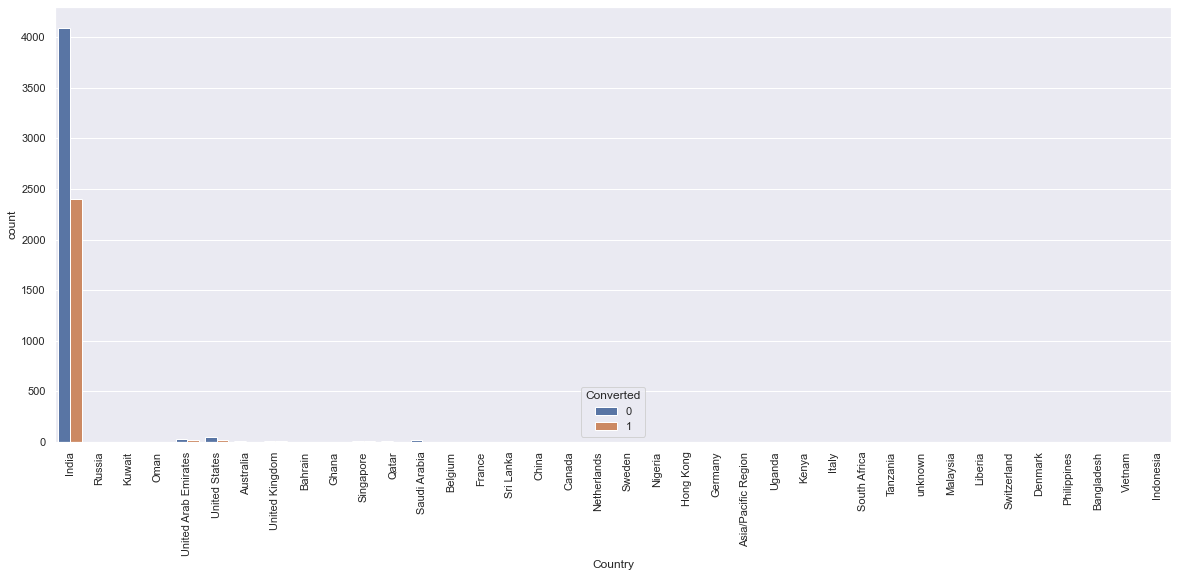

In [21]:
# Countplot of country column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df.Country, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [22]:
# Replacing NaN values in Country column

df.Country = df.Country.replace(np.NaN, 'India')

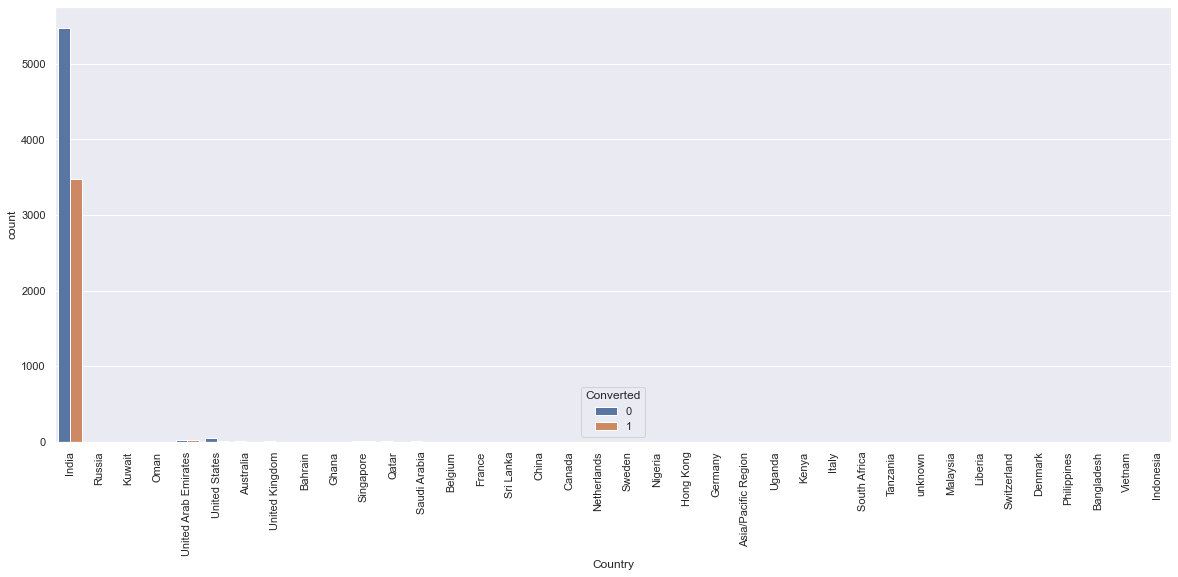

In [23]:
# Plotting the countplot again

plt.figure(figsize = (20,8))
s1 = sns.countplot(df.Country, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

#### We can drop this column as the number of values for India are quite high (around 97%).

In [24]:
# Creating a list of columns to be dropped

drop_cols = ['Country']

In [25]:
# Checking the value_counts of 'What is your current occupation' column

df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Replacing NaN values in Unemployed column

df['What is your current occupation'] = df['What is your current occupation'].replace(np.NaN, 'Unemployed')

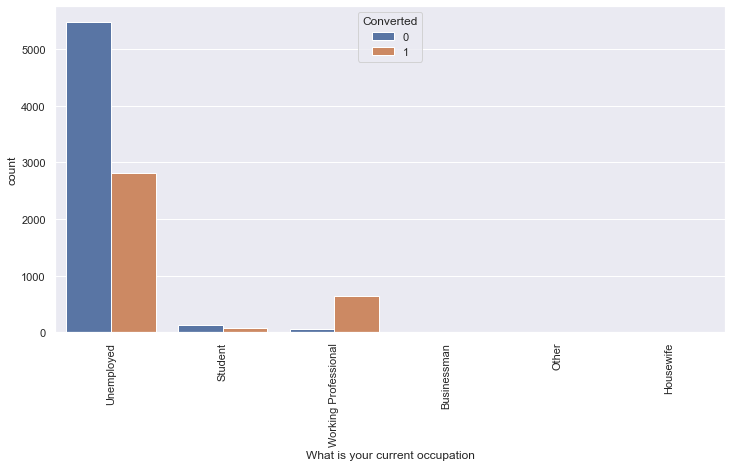

In [27]:
# Countplot of 'What is your current occupation' column

plt.figure(figsize=(12,6))
sns.set_theme(style = 'darkgrid')
s1 = sns.countplot(df['What is your current occupation'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [28]:
# Checking the value_counts of 'What matters most to you in choosing a course' column

df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Replacing NaN values in 'What matters most to you in choosing a course' column

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.NaN, 'Better Career Prospects')

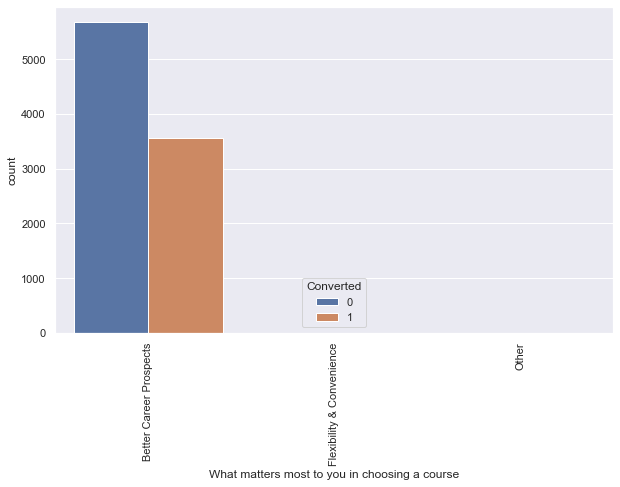

In [30]:
# Countplot of 'What matters most to you in choosing a course' column

plt.figure(figsize=(10,6))
sns.set_theme(style = 'darkgrid')
s1 = sns.countplot(df['What matters most to you in choosing a course'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [31]:
# Checking the values

df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
# Let's append this column to the drop_cols list

drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country', 'What matters most to you in choosing a course']

In [33]:
# Checking the value_counts of Specialization column

df.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
# Replacing NaN values in 'Specialization' column

df.Specialization = df.Specialization.replace(np.NaN, 'Not Specified')

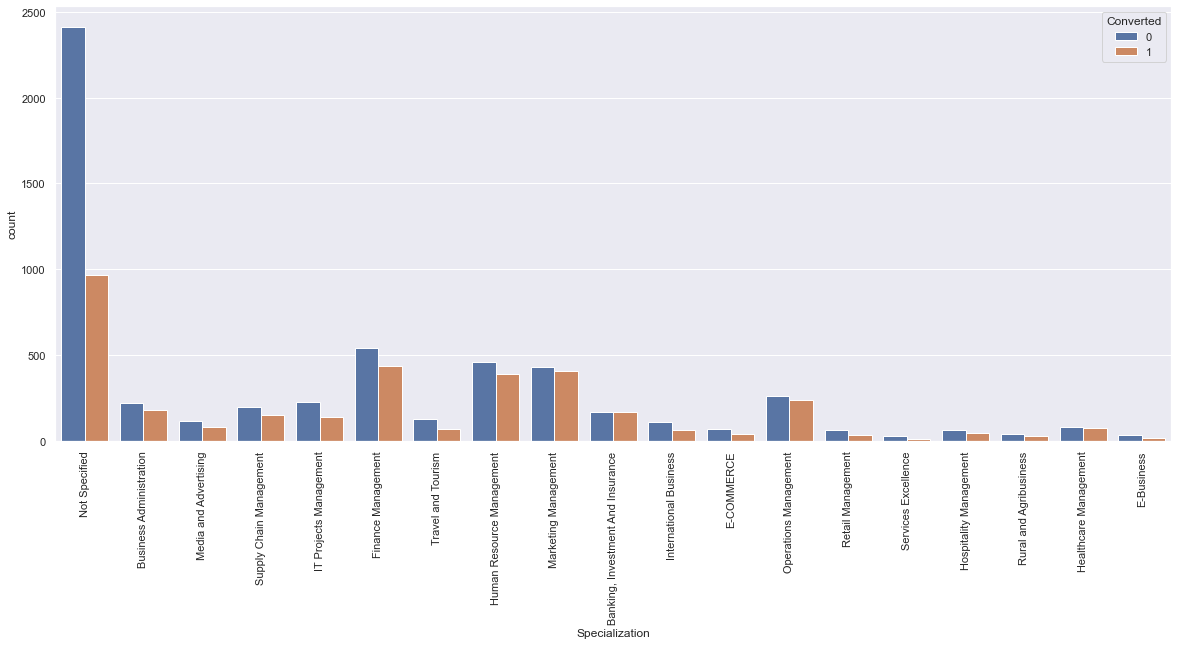

In [35]:
# Countplot of Specialization column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df.Specialization, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [36]:
# Combining the Management Specializations together

df.Specialization = df.Specialization.replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management Specializations')

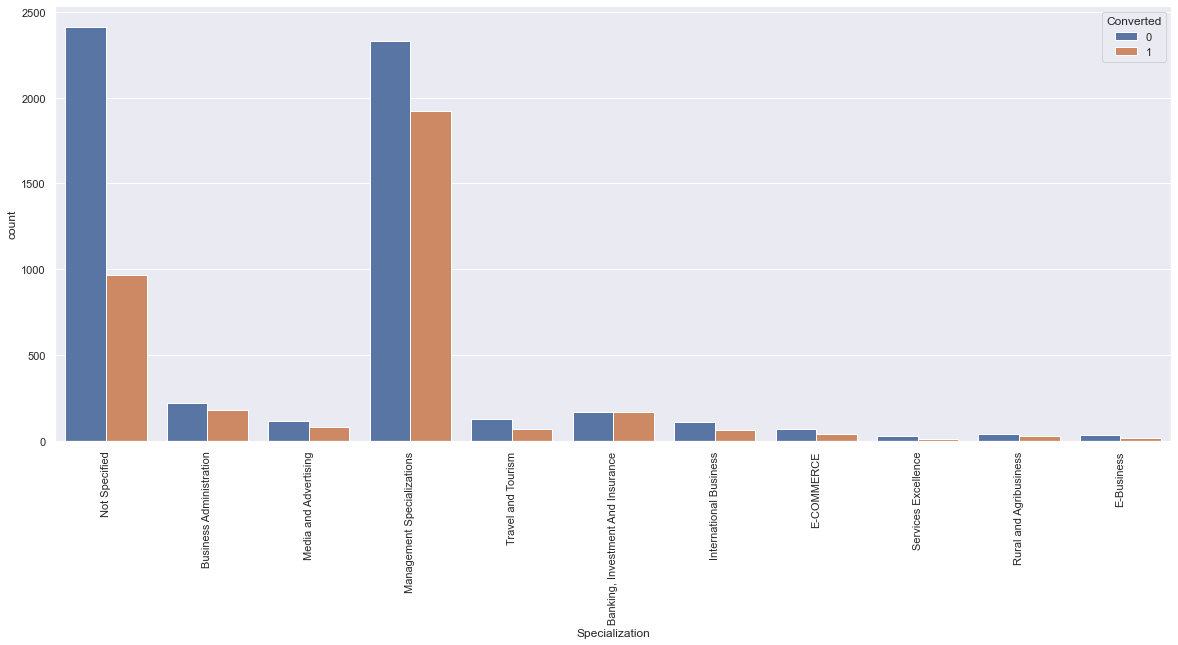

In [37]:
# Plotting the countplot again

plt.figure(figsize = (20,8))
s1 = sns.countplot(df.Specialization, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

In [38]:
# Checking the value_counts of Tags column

df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [39]:
# Replacing NaN values in 'Tags' column

df.Tags = df.Tags.replace(np.NaN, 'Not Specified')

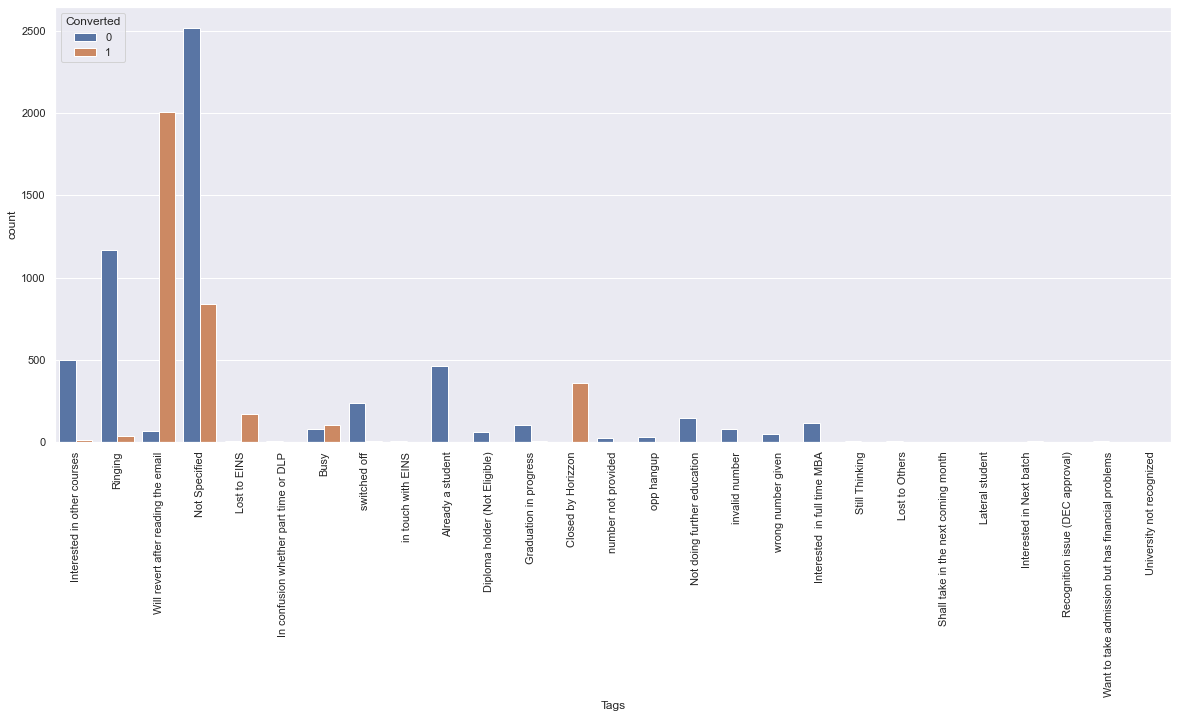

In [40]:
# Countplot of 'Tags' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df.Tags, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

In [41]:
# Combining the low value tags as 'Others'

df.Tags = df.Tags.replace(['Already a student', 'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'], 'Others')

In [42]:
# Checking the values

df.Tags.value_counts(dropna = False)

Not Specified                          3353
Others                                 2099
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Name: Tags, dtype: int64

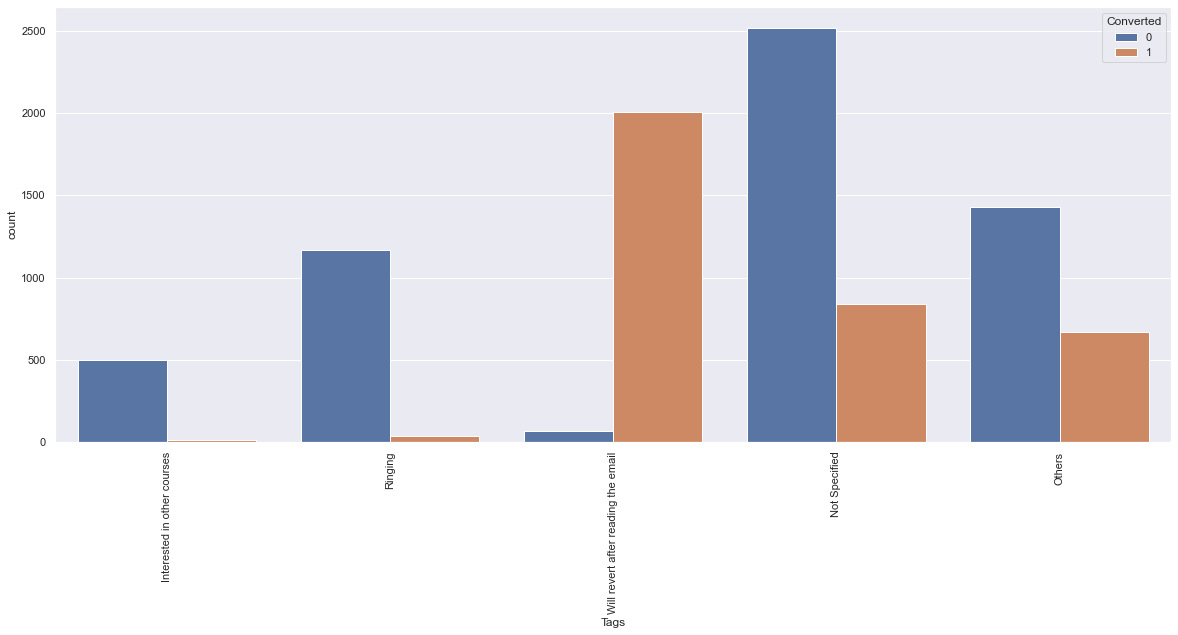

In [43]:
# Countplot of 'Tags' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df.Tags, hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [44]:
# Checking the value_counts of 'Last Activity' column

df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
# Replacing Nan values in 'Lead Activity' column

df['Last Activity'] = df['Last Activity'].replace(np.NaN, 'Others')

In [46]:
# Replacing the low values in 'Last Activity' as 'Others'

df['Last Activity'] = df['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

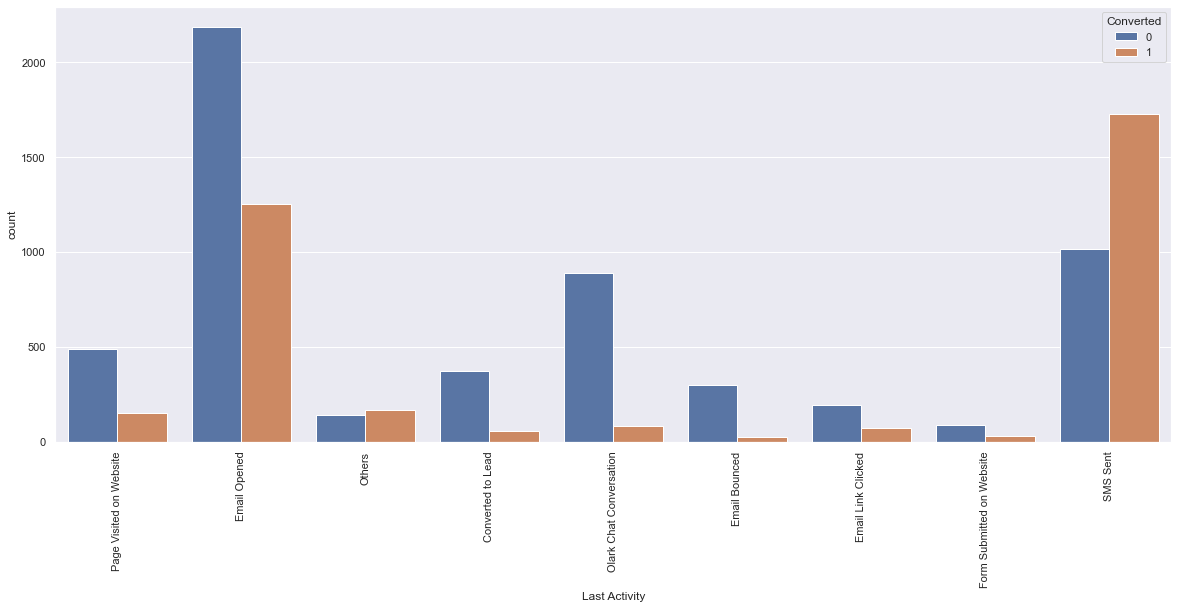

In [47]:
# Countplot of 'Last Activity' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df['Last Activity'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [48]:
# Let's append this column to the drop_cols list

drop_cols.append('Last Activity')
drop_cols

['Country', 'What matters most to you in choosing a course', 'Last Activity']

In [49]:
# Checking the value_counts of 'Lead Source' column

df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
testone                 1
youtubechannel          1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [50]:
# Replacing 'google' as 'Google'

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [51]:
# Replacing NaN values in 'Lead Source' column

df['Lead Source'] = df['Lead Source'].replace(np.NaN, 'Others')

In [52]:
# Replacing the low values in 'Lead Source' as 'Others'

df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'Social Media', 'WeLearn', 'youtubechannel', 'welearnblog_Home', 'NC_EDM', 'Pay per Click Ads', 'blog', 'testone'], 'Others')

In [53]:
# Checking the values again

df['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                57
Facebook              55
Live Chat              2
Name: Lead Source, dtype: int64

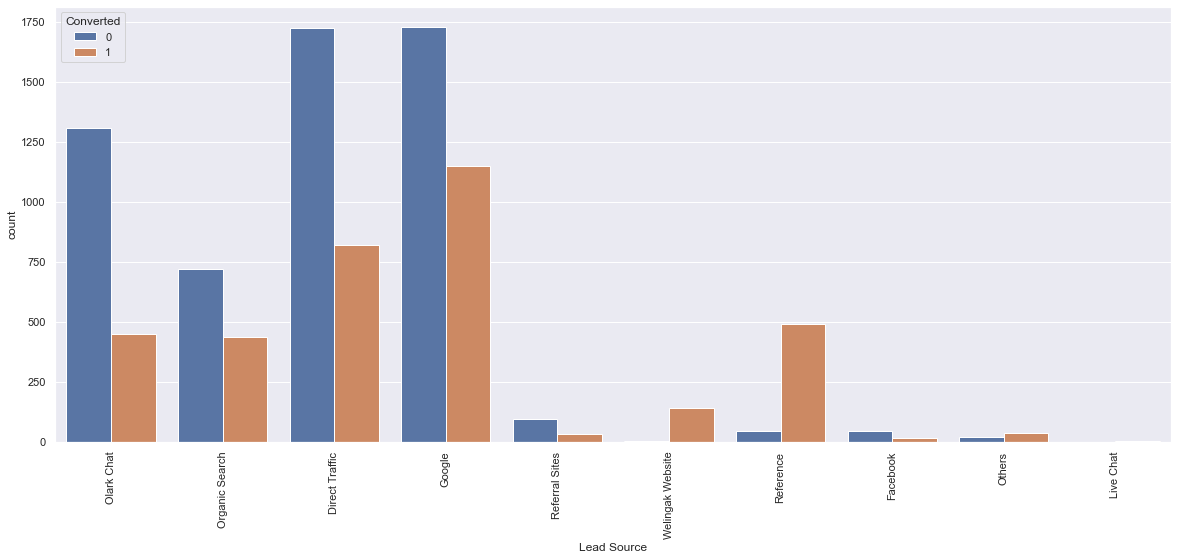

In [54]:
# Countplot of 'Lead Source' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df['Lead Source'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [55]:
round(100* (df.isnull().sum()/ len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [56]:
# Checking the value_counts of 'Lead Origin' column

df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

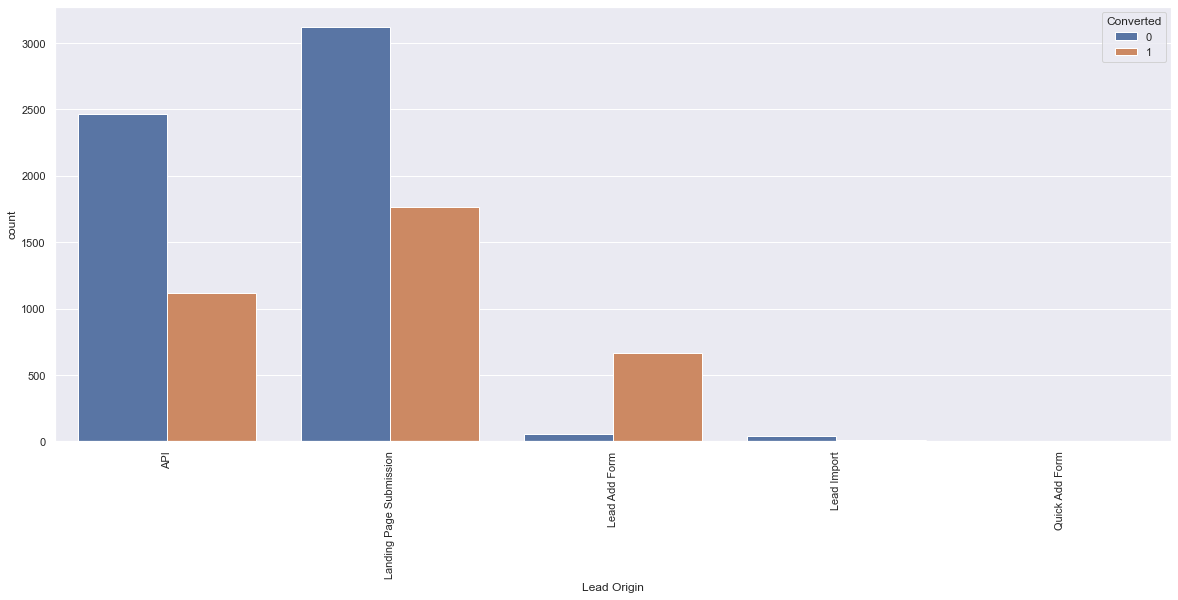

In [57]:
# Countplot of 'Lead Origin' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df['Lead Origin'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [58]:
# Checking the value_counts of 'Last Notable Activity' column

df['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [59]:
# Replacing the low values in 'Last Notable Activity' as 'Others'

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Form Submitted on Website', 'Resubscribed to emails', 'View in browser link Clicked', 'Email Received', 'Approached upfront', 'Email Marked Spam', 'Had a Phone Conversation', 'Unreachable'], 'Others')

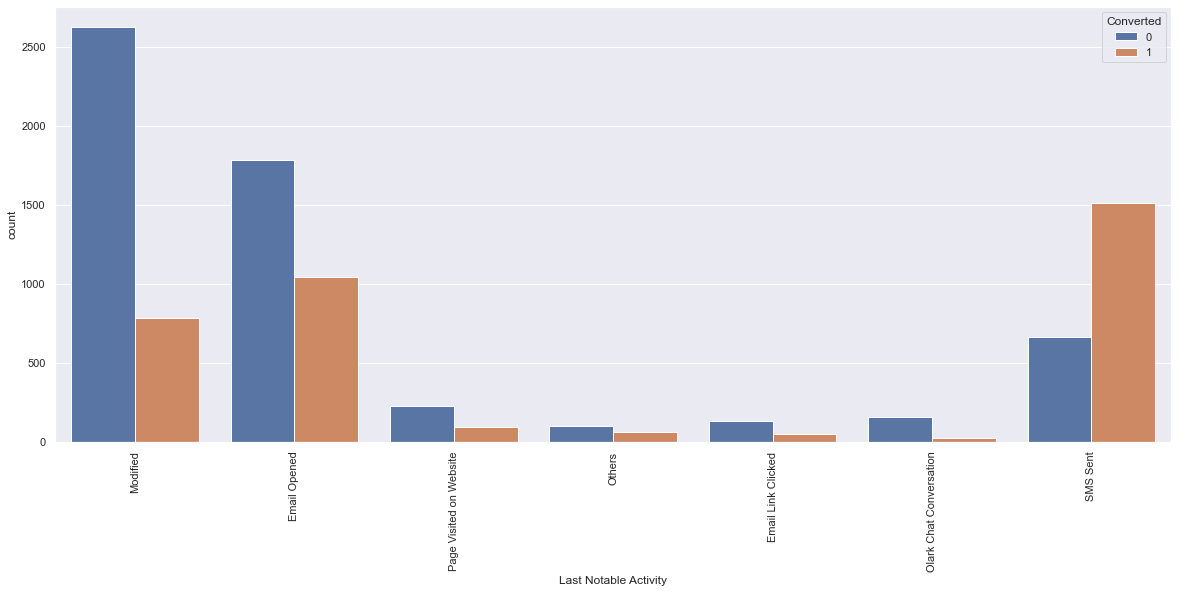

In [60]:
# Countplot of 'Last Notable Activity' column

plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
s1 = sns.countplot(df['Last Notable Activity'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

### Observations :

In [61]:
# Let's append this column to the drop_cols list

drop_cols.append('Last Notable Activity')
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity']

### Let's check the imbalance for all the remaing variables having Yes/No values.

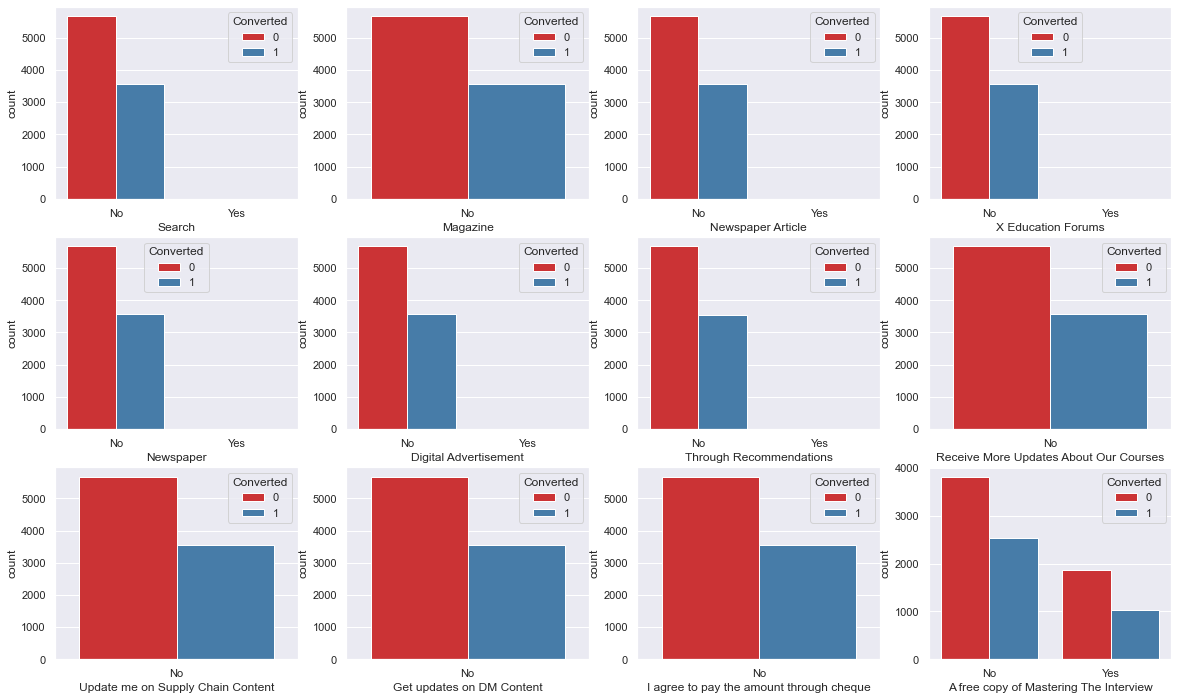

In [62]:
# Visualzing  variables for imbalancing

fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df, ax = axs[0,0],palette = 'Set1')
sns.countplot(x = "Magazine", hue = "Converted", data = df, ax = axs[0,1],palette = 'Set1')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df, ax = axs[0,2],palette = 'Set1')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df, ax = axs[0,3],palette = 'Set1')
sns.countplot(x = "Newspaper", hue = "Converted", data = df, ax = axs[1,0],palette = 'Set1')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df, ax = axs[1,1],palette = 'Set1')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df, ax = axs[1,2],palette = 'Set1')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df, ax = axs[1,3],palette = 'Set1')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df, ax = axs[2,0],palette = 'Set1')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df, ax = axs[2,1],palette = 'Set1')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df, ax = axs[2,2],palette = 'Set1')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df, ax = axs[2,3],palette = 'Set1')
plt.show()

In [63]:
# Checking the value_counts of 'Do Not Email' column

df['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [64]:
# Checking the value_counts of 'Do Not Email' column

df['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

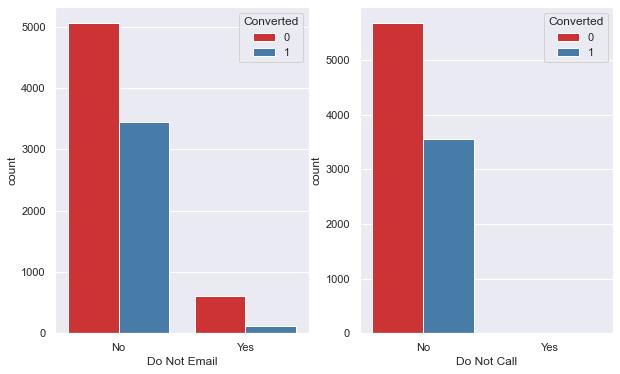

In [65]:
fig, axs = plt.subplots(1,2, figsize=(10,6))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = df, ax = axs[0], palette = 'Set1')
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = df, ax = axs[1], palette = 'Set1')
plt.show()

In [66]:
# Let's append the columns having high imbalance to the drop_cols list

drop_cols.extend(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'])
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [67]:
# Checking the percentage of null values

round(100* (df.isnull().sum()/ len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [68]:
# Remaining columns have less than 2% null values so let's just drop them.

df = df.dropna()

In [69]:
# Checking the percentage of null values after final imputation

round(100* (df.isnull().sum()/ len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [70]:
df.shape

(9103, 28)

In [71]:
# Dropping the columns

leads = df.drop(drop_cols, 1)

In [72]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Specialization                   9103 non-null   object 
 8   What is your current occupation  9103 non-null   object 
 9   Tags                             9103 non-null   object 
 10  City                             9103 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 853.4+ KB


In [73]:
leads.shape

(9103, 11)

In [74]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Unemployed,Will revert after reading the email,Mumbai


### Analyzing the Numerical Attributes

In [75]:
# Converted is the target variable so let's check the current conversion rate

Converted = sum((leads.Converted)/ len(leads.Converted.index)) *100
Converted

38.020432824344105

#### Current lead conversion is around 38%.

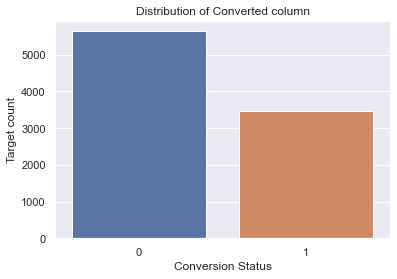

In [76]:
# Countplot of 'Converted' column

sns.countplot(leads.Converted)
plt.title('Distribution of Converted column')
plt.xlabel('Conversion Status')
plt.ylabel('Target count')
plt.show()

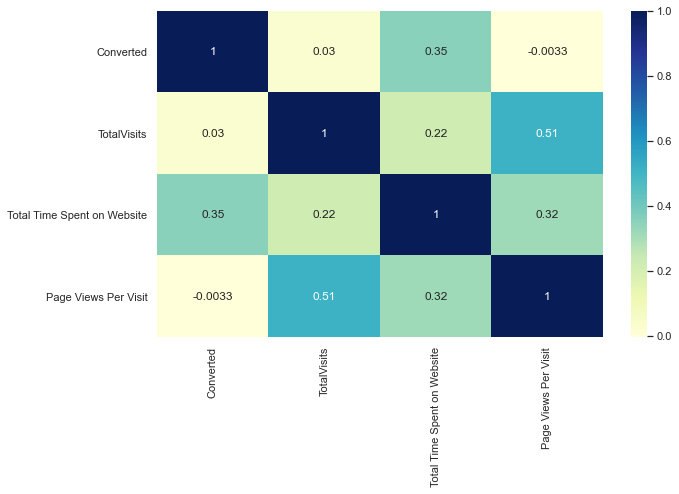

In [77]:
# Checking the correlation of the numerical variables

plt.figure(figsize=(10,6))

sns.heatmap(leads.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

<AxesSubplot:ylabel='TotalVisits'>

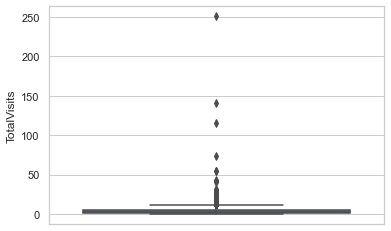

In [78]:
# Visualiznig the spread of 'TotalVisits' variable

sns.set_theme(style = 'whitegrid')
sns.boxplot(y = leads.TotalVisits)

#### Clearly, we need to treat the outliers present in 'TotalVisits'.

In [79]:
# Checking the percentile values for 'TotalVisits'

leads.TotalVisits.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

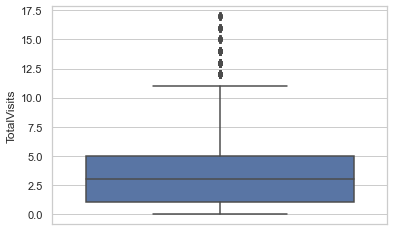

In [80]:
# Outlier treatment for 'TotalVisits' variable, removing 1% values from top and bottom.

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]


# visualizing after outlier treatment

sns.boxplot(y = leads.TotalVisits)
plt.show()

In [81]:
leads.shape

(9020, 11)

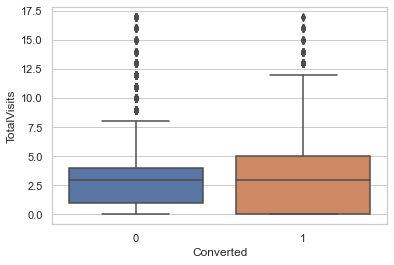

In [82]:
# Visualizing 'TotalVisits' with 'Converted' column

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [83]:
# Checking the percentile values for 'Total Time Spent on Website'

leads['Total Time Spent on Website'].describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:ylabel='Total Time Spent on Website'>

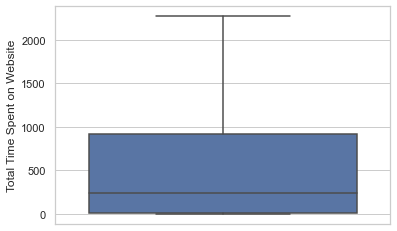

In [84]:
# Visualiznig the spread of 'Total Time Spent on Website' variable

sns.boxplot(y=leads['Total Time Spent on Website'])

#### There are no major outliers in the variable 'Total Time Spent on Website' so no outlier treatment required.

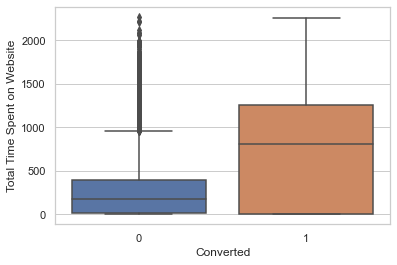

In [85]:
# Visualizing 'Total Time Spent on Website' with 'Converted' column

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

In [86]:
# Checking the percentile values for 'Page Views Per Visit on Website'

leads['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

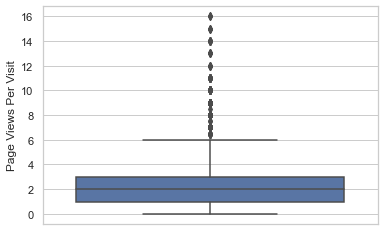

In [87]:
# Visualiznig the spread of 'Total Time Spent on Website' variable.

sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

#### Clearly, we need to treat the outliers present in the above variables.

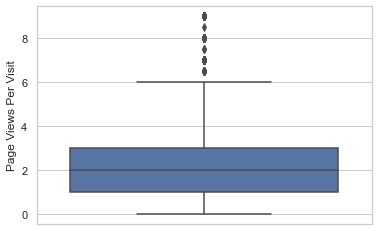

In [88]:
# Outlier treatment for 'Page Views Per Visit' variable, removing 1% values from top and bottom.

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]


# visualizing after outlier treatment

sns.boxplot(y = leads['Page Views Per Visit'])
plt.show()

In [89]:
leads.shape

(8953, 11)

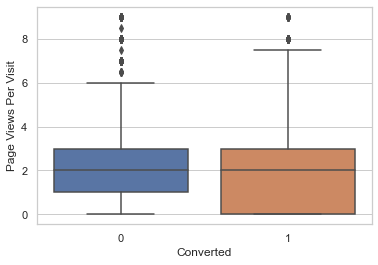

In [90]:
# Visualizing 'Page Views Per Visit' with 'Converted' column

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

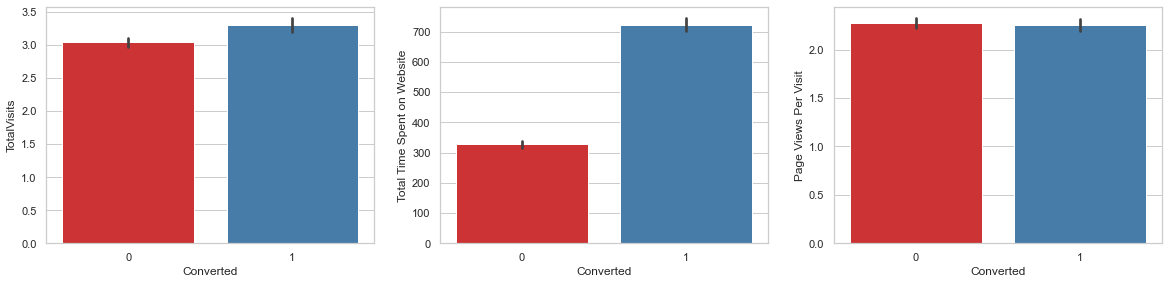

In [91]:
# Checking conversion for all the numeric columns

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = leads, palette = 'Set1')
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads, palette = 'Set1')
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = leads, palette = 'Set1')
plt.show()

#### The conversion rate looks good so we can proceed with Data Preparation.

## Data Preparation

In [92]:
# List of variables to be mapped

varlist =  ['Do Not Email']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

leads[varlist] = leads[varlist].apply(binary_map)

In [93]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,0,0,0.0,0,0.0,Not Specified,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,0,0,5.0,674,2.5,Not Specified,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Specified,Unemployed,Will revert after reading the email,Mumbai


In [94]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8953 non-null   object 
 1   Lead Source                      8953 non-null   object 
 2   Do Not Email                     8953 non-null   int64  
 3   Converted                        8953 non-null   int64  
 4   TotalVisits                      8953 non-null   float64
 5   Total Time Spent on Website      8953 non-null   int64  
 6   Page Views Per Visit             8953 non-null   float64
 7   Specialization                   8953 non-null   object 
 8   What is your current occupation  8953 non-null   object 
 9   Tags                             8953 non-null   object 
 10  City                             8953 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


### Creating Dummy Variables

In [95]:
# Getting a list of categorical columns

cat_columns = leads.select_dtypes(include = ['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Tags', 'City'],
      dtype='object')

In [96]:
# Getting dummies and adding the results to the master dataframe

dummy = pd.get_dummies(leads[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)

leads = pd.concat([leads,dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [100]:
# Dropping the original columns after creating dummy variables

leads.drop(cat_columns, inplace = True, axis = 1)

In [101]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   What is your current occupation_Housewife             8953

## Model Building using Train-Test Split & Logistic Regression

In [102]:
# Train-Test Split

y = leads.Converted

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
X = leads.drop('Converted', axis = 1)

In [104]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 6   Lead Origin_Lead Import                               6267 non-null   uint8  
 7   What is your current occupation_Housewife             6267 non-null   uint8  
 8   What is your current occupation_Other                 6

In [106]:
# Scaling of numeric columns

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include = ['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Will revert after reading the email,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
9196,-0.28572,0.668862,1.848117,1.455819,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4696,-0.28572,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3274,-0.28572,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2164,-0.28572,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## Model Building using Stats Model and RFE

In [107]:
logreg = LogisticRegression()


# Getting 15 variables as output using RFE

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([False, False,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True])

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', False, 7),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 17),
 ('City_Other Cities of Maharashtra', False, 25),
 ('City_Other Metro Cities', False, 19),
 ('City_Thane & Outskirts', False, 16),
 ('City_Tier II Cities', False, 12),
 ('Specialization_Banking, Investment And Insurance', False, 4),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 15),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Intern

In [110]:
# List of columns by RFE

list_cols = X_train.columns[rfe.support_]
list_cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Tags_Others',
       'Lead Source_Facebook', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference'],
      dtype='object')

### Model number 1

In [112]:
# Building the model

X_train_sm = sm.add_constant(X_train[list_cols])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1900.3
Date:                Wed, 13 Oct 2021   Deviance:                       3800.7
Time:                        02:03:44   Pearson chi2:                 7.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5996      0.090     -6.693      0.000      -0.775      -0.424
Total Time Spent on Website                              1.1027      0.048     22.885      0.000       1.008       1.197
Lead Origin_Lead Add Form                                3.3250      0.303     10.988      0.000       2.732       3.918
What is your current occupation_Other                   -1.7992      1.026     -1.754      0.079      -3.809       0.211
What is your current occupation_Student                 -1.1392      0.337     -3.377      0.001      -1.800      -0.478
What is your current occupation_Working Professional     1.5931      0.288      5.541      0.000       1.030       2.157
Specialization_Services Excellence                      -0.9108      0.666     -1.368      0.171      -2.215       0.394
Specialization_Travel and Tourism                       -1.1295      0.366     -3.087      0.002      -1.847      -0.412
Tags_Interested in other courses                        -3.0132      0.387     -7.795      0.000      -3.771      -2.256
Tags_Ringing                                            -2.6461      0.226    -11.694      0.000      -3.090      -2.203
Tags_Will revert after reading the email                 4.3411      0.174     25.001      0.000       4.001       4.681
Lead Source_Direct Traffic                              -1.1954      0.133     -8.980      0.000      -1.456      -0.934
Lead Source_Google                                      -0.7217      0.124     -5.797      0.000      -0.966      -0.478
Lead Source_Organic Search                              -0.7903      0.157     -5.019      0.000      -1.099      -0.482
Lead Source_Referral Sites                              -1.3239      0.450     -2.945      0.003      -2.205      -0.443
Lead Source_Welingak Website                             2.6587      1.047      2.538      0.011       0.606       4.712
========================================================================================================================
"""

#### p-value of variable 'Specialization_Services Excellence' is high, so we can drop it.

In [113]:
# Drropping the column with high p-value

list_cols = list_cols.drop('Specialization_Services Excellence', 1)

### Model number 2

In [114]:
X_train_sm = sm.add_constant(X_train[list_cols])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1901.4
Date:                Wed, 13 Oct 2021   Deviance:                       3802.8
Time:                        02:03:44   Pearson chi2:                 7.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5996      0.090     -6.692      0.000      -0.775      -0.424
Total Time Spent on Website                              1.1030      0.048     22.895      0.000       1.009       1.197
Lead Origin_Lead Add Form                                3.3116      0.302     10.952      0.000       2.719       3.904
What is your current occupation_Other                   -1.7920      1.026     -1.747      0.081      -3.803       0.219
What is your current occupation_Student                 -1.1338      0.337     -3.362      0.001      -1.795      -0.473
What is your current occupation_Working Professional     1.5880      0.288      5.511      0.000       1.023       2.153
Specialization_Travel and Tourism                       -1.1241      0.366     -3.072      0.002      -1.841      -0.407
Tags_Interested in other courses                        -3.0085      0.386     -7.786      0.000      -3.766      -2.251
Tags_Ringing                                            -2.6402      0.226    -11.673      0.000      -3.083      -2.197
Tags_Will revert after reading the email                 4.3414      0.174     25.018      0.000       4.001       4.682
Lead Source_Direct Traffic                              -1.2081      0.133     -9.088      0.000      -1.469      -0.948
Lead Source_Google                                      -0.7241      0.124     -5.816      0.000      -0.968      -0.480
Lead Source_Organic Search                              -0.7934      0.157     -5.041      0.000      -1.102      -0.485
Lead Source_Referral Sites                              -1.3309      0.449     -2.965      0.003      -2.211      -0.451
Lead Source_Welingak Website                             2.6724      1.047      2.551      0.011       0.619       4.725
========================================================================================================================
"""

#### p-value of variable 'What is your current occupation_Other' is high, so we can drop it.

In [115]:
# Drropping the column with high p-value

list_cols = list_cols.drop('What is your current occupation_Other', 1)

### Model number 3

In [116]:
X_train_sm = sm.add_constant(X_train[list_cols])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1902.9
Date:                Wed, 13 Oct 2021   Deviance:                       3805.9
Time:                        02:03:44   Pearson chi2:                 7.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6036      0.090     -6.739      0.000      -0.779      -0.428
Total Time Spent on Website                              1.0992      0.048     22.867      0.000       1.005       1.193
Lead Origin_Lead Add Form                                3.3112      0.302     10.955      0.000       2.719       3.904
What is your current occupation_Student                 -1.1267      0.337     -3.347      0.001      -1.787      -0.467
What is your current occupation_Working Professional     1.5925      0.288      5.532      0.000       1.028       2.157
Specialization_Travel and Tourism                       -1.1182      0.365     -3.062      0.002      -1.834      -0.402
Tags_Interested in other courses                        -3.0079      0.386     -7.788      0.000      -3.765      -2.251
Tags_Ringing                                            -2.6359      0.226    -11.657      0.000      -3.079      -2.193
Tags_Will revert after reading the email                 4.3292      0.173     25.028      0.000       3.990       4.668
Lead Source_Direct Traffic                              -1.2088      0.133     -9.093      0.000      -1.469      -0.948
Lead Source_Google                                      -0.7201      0.124     -5.788      0.000      -0.964      -0.476
Lead Source_Organic Search                              -0.7871      0.157     -5.007      0.000      -1.095      -0.479
Lead Source_Referral Sites                              -1.3247      0.448     -2.955      0.003      -2.203      -0.446
Lead Source_Welingak Website                             2.6735      1.047      2.553      0.011       0.621       4.726
========================================================================================================================
"""

In [117]:
# p-values looks good in the model
# Let's check the VIF values of the feature variables. 

vif = pd.DataFrame()
vif['Features'] = X_train[list_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[list_cols].values, i) for i in range(X_train[list_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.67
1,Lead Origin_Lead Add Form,1.62
12,Lead Source_Welingak Website,1.34
9,Lead Source_Google,1.32
3,What is your current occupation_Working Profes...,1.29
6,Tags_Ringing,1.24
8,Lead Source_Direct Traffic,1.24
0,Total Time Spent on Website,1.19
10,Lead Source_Organic Search,1.15
5,Tags_Interested in other courses,1.10


In [118]:
# Getting Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.126951
4696    0.011099
3274    0.116138
2164    0.010970
1667    0.987735
7024    0.173327
8018    0.173327
778     0.108461
6942    0.173327
4440    0.101836
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12695083, 0.01109877, 0.11613785, 0.01096977, 0.98773491,
       0.17332741, 0.17332741, 0.10846116, 0.17332741, 0.10183556])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.126951,9196
1,0,0.011099,4696
2,0,0.116138,3274
3,0,0.010970,2164
4,1,0.987735,1667


In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.126951,9196,0
1,0,0.011099,4696,0
2,0,0.116138,3274,0
3,0,0.010970,2164,0
4,1,0.987735,1667,1


In [122]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3644  238]
 [ 574 1811]]


In [123]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8704324238072443


In [124]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [125]:
# Checking the sensitivity

TP / float(TP+FN)

0.7593291404612159

In [126]:
# Checking the specificity

TN / float(TN+FP)

0.9386913961875322

In [127]:
# Calculating False Postive Rate - predicting conversion when lead did not convert

print(FP/ float(TN+FP))

0.0613086038124678


In [128]:
# Positive predictive value

print (TP / float(TP+FP))

0.8838457784285018


In [129]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8639165481270744


### Plotting the ROC curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

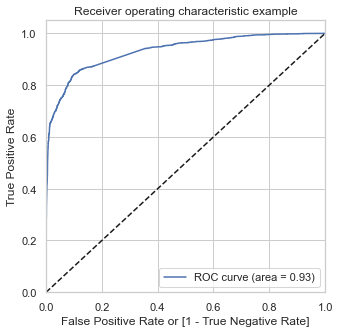

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [133]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.126951,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.011099,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.116138,3274,0,1,1,0,0,0,0,0,0,0,0
3,0,0.010970,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987735,1667,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/ total1
    
    specificity = cm1[0,0]/ (cm1[0,0] + cm1[0,1])
    sensitivity = cm1[1,1]/ (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [ i ,accuracy, sensitivity, specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380565     1.000000     0.000000
0.1   0.1  0.636349     0.970650     0.430963
0.2   0.2  0.859422     0.867925     0.854199
0.3   0.3  0.877294     0.841929     0.899021
0.4   0.4  0.876655     0.805031     0.920659
0.5   0.5  0.870432     0.759329     0.938691
0.6   0.6  0.868039     0.717820     0.960330
0.7   0.7  0.861337     0.675052     0.975786
0.8   0.8  0.858465     0.653669     0.984286
0.9   0.9  0.837402     0.587421     0.990984


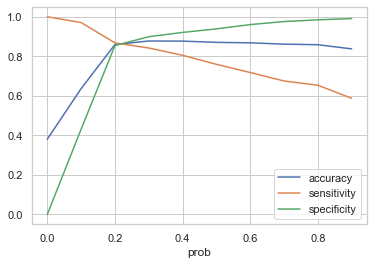

In [135]:
# Plotting the accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

In [136]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.126951,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.011099,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.116138,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.010970,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.987735,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x * 100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.126951,9196,0,13
1,0,0.011099,4696,0,1
2,0,0.116138,3274,0,12
3,0,0.010970,2164,0,1
4,1,0.987735,1667,1,99


In [138]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8594223711504707

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3316,  566],
       [ 315, 2070]], dtype=int64)

In [140]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [141]:
# Checking the sensitivity of our model

TP / float(TP + FN)

0.7593291404612159

In [142]:
# Checking the specificity of our model

TN / float(TN + FP)

0.9386913961875322

### Observation :

In [143]:
# Calculating False Postive Rate - predicting conversion when lead did not have convert

print(FP/ float(TN + FP))

0.0613086038124678


In [144]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8838457784285018


In [145]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8639165481270744


In [146]:
# Let's look at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3316,  566],
       [ 315, 2070]], dtype=int64)

In [147]:
# Checking the Precision

TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7852807283763278

In [148]:
# Checking he Recall

TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8679245283018868

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7852807283763278

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8679245283018868

In [151]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

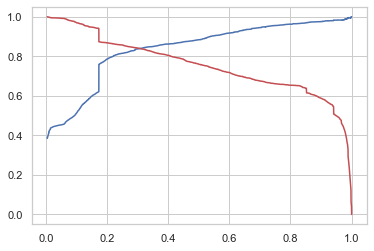

In [152]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
# Scaling the test data

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Will revert after reading the email,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
7681,-0.285720,0.668862,-0.304384,0.135997,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
984,-0.285720,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8135,3.499924,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6915,-0.285720,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2712,-0.285720,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [154]:
X_test = X_test[list_cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Student,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website
7681,-0.304384,0,0,0,0,0,1,0,1,0,0,0,0
984,-0.538073,0,0,0,0,0,0,0,0,0,1,0,0
8135,0.794688,0,0,0,0,0,0,0,1,0,0,0,0
6915,-0.614753,0,0,0,0,0,1,0,0,1,0,0,0
2712,-0.412100,0,0,0,0,0,0,1,0,1,0,0,0


In [155]:
X_test_sm = sm.add_constant(X_test)

### Predictions on test data

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

7681    0.008303
984     0.121091
8135    0.281135
6915    0.009610
2712    0.927741
244     0.022027
4698    0.101010
8287    0.173327
6791    0.976256
8970    0.009527
dtype: float64

In [158]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
y_pred_1.head()

,0
7681,0.008303
984,0.121091
8135,0.281135
6915,0.009610
2712,0.927741


In [160]:
# Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting CustID as index

y_test_df['Prospect ID'] = y_test_df.index

In [162]:
# Removing index for both dataframes

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.008303
1,0,984,0.121091
2,0,8135,0.281135
3,0,6915,0.009610
4,1,2712,0.927741


In [165]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [166]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.008303
1,0,984,0.121091
2,0,8135,0.281135
3,0,6915,0.009610
4,1,2712,0.927741


In [167]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.008303,1
1,984,0,0.121091,12
2,8135,0,0.281135,28
3,6915,0,0.009610,1
4,2712,1,0.927741,93


In [169]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.008303,1,0
1,984,0,0.121091,12,0
2,8135,0,0.281135,28,1
3,6915,0,0.009610,1,0
4,2712,1,0.927741,93,1


In [171]:
# Let's check if 80% cases are correctly predicted or not based on the converted column

# Total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    872
0    138
Name: final_Predicted, dtype: int64

In [172]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

In [173]:
# Overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8600148920327625

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1438,  238],
       [ 138,  872]], dtype=int64)

In [175]:
TP = confusion2[1,1] # True positive 
TN = confusion2[0,0] # True negatives
FP = confusion2[0,1] # False positives
FN = confusion2[1,0] # False negatives

In [176]:
# Checking the sensitivity

TP / float(TP + FN)

0.8633663366336634

In [177]:
# Checking the specificity

TN / float(TN + FP)

0.8579952267303103

In [178]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7855855855855856

In [179]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8633663366336634

### Observations :

# Final Observations :